# Business Problem

Dream housing finance company deals in all kinds of home loans. They have presence across
all urban, semi urban, rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.


Company wants to automate the loan eligibility process(real time) based on customer detail provided while filling online application form. These detils are Gender, Marrital status, Education, Number of dependents, Income, Loan Ammount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target this customeres.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\ML_data\LoanData.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Understanding

- Loan_ID' : Unique Loan Id  
- Gender : Male/Female
- Married : Applicant marriage details
- Dependents : Number of dependents
- Education : Applicants Education
- Self_Employed : whether applicant is self employed
- ApplicantIncome: Applicant Income
- CoapplicantIncome : Coapplicant Income
- LoanAmount : Loan Amount in thousand
- Loan_Amount_Term : Term of loan in Months
- Credit_History :  meets guidlines 
- Property_Area: Urban/ semi urban/ Rural
- Loan_Status : Loan Approved **Target Variable**Loan_Status'

In [6]:
df['Loan_Status'].value_counts() # Output variable

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**All columns are given in the correct syntax**

# Data Exploration

In [9]:
df['Loan_ID'].nunique()

614

**use of this loan_id is use to get original data its a primary key**

**Drop unimportant columns as per feature selection(Filter Method)**


in this dataset we no need to ask for original data so loan id can be remove here only
if in the real world we have to fill with originl data then after filling missing values you have t remove that column.

In [10]:
df.drop(columns = ['Loan_ID'], inplace =True)

In [11]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

**This Gender has missing values**

In [12]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

**Marrried column is also contain missing values**

In [13]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

**its in string format and with wrong data we should chenge datatype and correct data**

In [14]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [15]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
df['Self_Employed'].unique()


array(['No', 'Yes', nan], dtype=object)

In [17]:
df['Self_Employed'].value_counts()


Self_Employed
No     500
Yes     82
Name: count, dtype: int64

**self employed contains missing values and most of them are not self employed means they are salaried**

In [18]:
df['ApplicantIncome'].unique()
# Its continous variable

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [19]:
df['ApplicantIncome'].describe()


count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [20]:
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(columns = ['ApplicantIncome', 'CoapplicantIncome'], inplace = True)

In [21]:
# Income is continous data
df['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [22]:
df['LoanAmount'].unique()
# Its continous variable 

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [23]:
df['LoanAmount'].describe()


count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [24]:
df['Loan_Amount_Term'].unique()


array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

**months should be in int format but when nan values present then all values will convert in float automatcally**

In [25]:
df['Loan_Amount_Term'].value_counts()


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [26]:
df['Credit_History'].unique()


array([ 1.,  0., nan])

In [27]:
df['Credit_History'].value_counts()


Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [28]:
df['Credit_History'] = df['Credit_History'].replace({1 : 'good', 0 : 'bad' })


In [29]:
df['Credit_History'].unique()


array(['good', 'bad', nan], dtype=object)

In [30]:
df['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [31]:
df['Property_Area'].unique()


array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [32]:
df['Property_Area'].value_counts()


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [33]:
df['Loan_Status'].unique()


array(['Y', 'N'], dtype=object)

In [34]:
df['Loan_Status'].value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [35]:
continous = [ 'LoanAmount',  'Income']
discrete_categorical = ['Gender', 'Married','Education', 'Self_Employed', 'Credit_History', 'Property_Area',
       'Loan_Status']

discrete_count = [ 'Dependents','Loan_Amount_Term']

# Exploratory Data Analysis(EDA)

**for continous variable**


In [36]:
df[continous].describe()

,LoanAmount,Income
count,592.000000,614.000000
mean,146.412162,7024.705081
std,85.587325,6458.663872
min,9.000000,1442.000000
25%,100.000000,4166.000000
50%,128.000000,5416.500000
75%,168.000000,7521.750000
max,700.000000,81000.000000


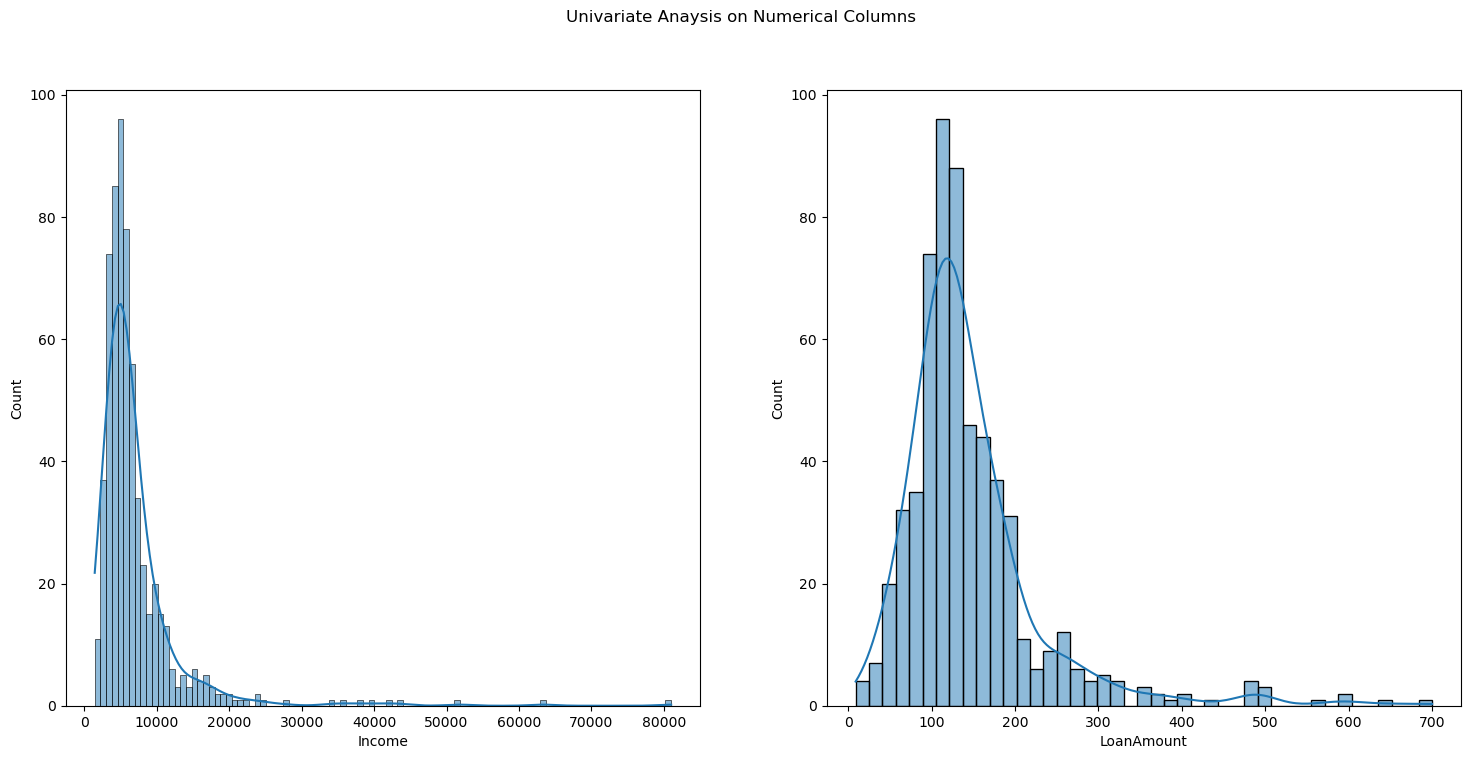

In [37]:

plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
sns.histplot(df['Income'], kde = True)

plt.subplot(1,2,2)
sns.histplot(df['LoanAmount'], kde = True)

plt.suptitle('Univariate Anaysis on Numerical Columns')
plt.show()


**from both graphs we can observe that in Income more amount of data lies in between 0 to 20000 and LoanAmount between 0 to 300**

In [38]:
df[continous].skew()

LoanAmount    2.677552
Income        5.633449
dtype: float64

**we can observe from skewness both columns are right skewed**

<Axes: >

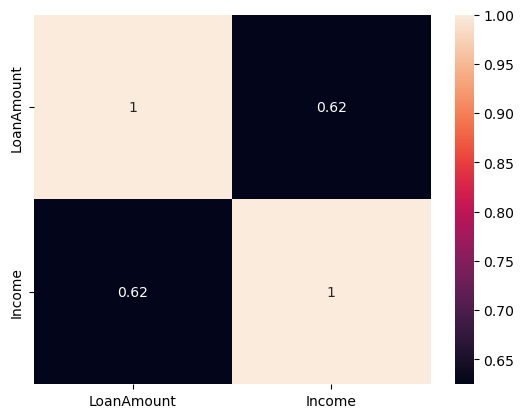

In [39]:
sns.heatmap(df[continous].corr(), annot = True)

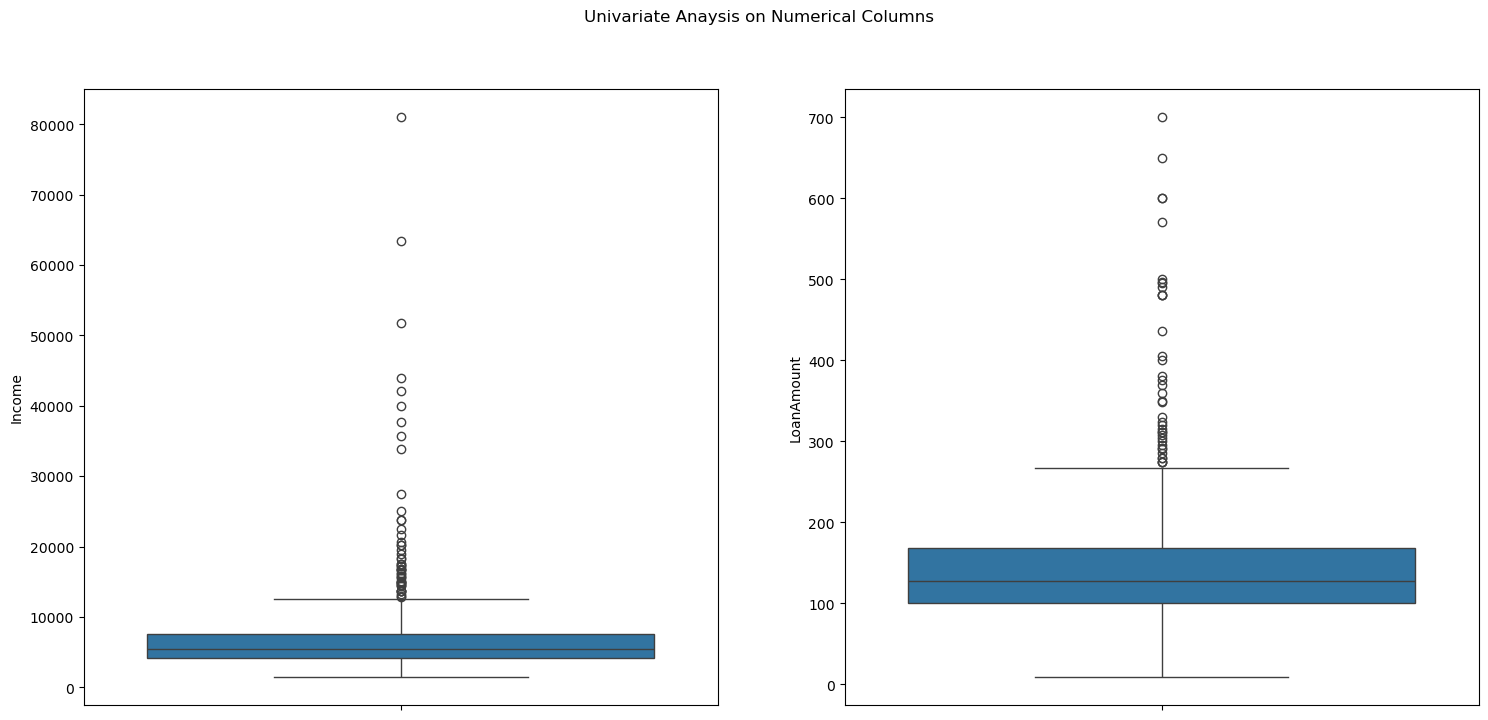

In [40]:
# visualize outliers

plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
sns.boxplot(df['Income'])

plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Univariate Anaysis on Numerical Columns')
plt.show()


**both columns have outliers**

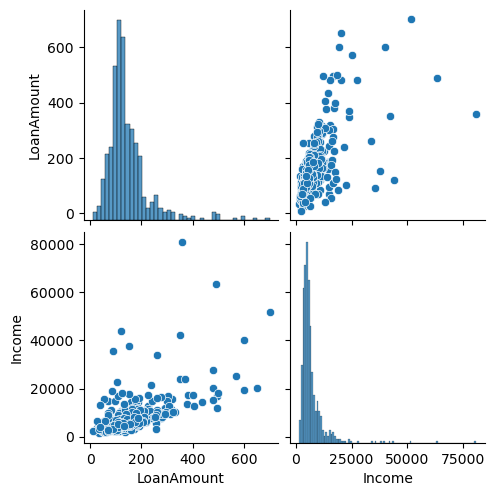

In [41]:
sns.pairplot(df[continous])


**For discrete variables**

In [42]:
df[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


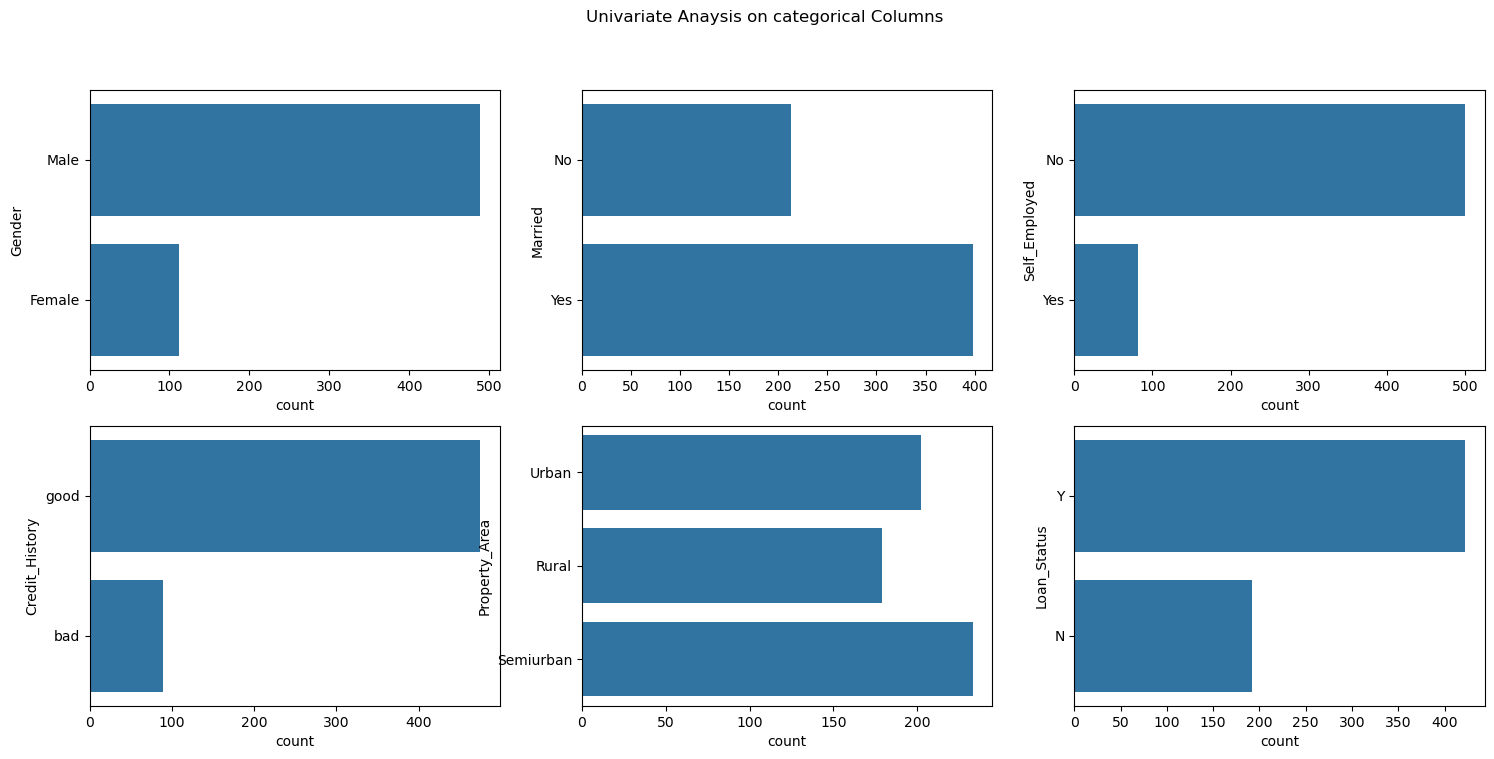

In [43]:
# visualize outliers

plt.figure(figsize = (18, 8))
plt.subplot(2,3,1)
sns.countplot(df['Gender'])

plt.subplot(2,3,2)
sns.countplot(df['Married'])

plt.subplot(2,3,3)
sns.countplot(df['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(df['Credit_History'])


plt.subplot(2,3,5)
sns.countplot(df['Property_Area'])


plt.subplot(2,3,6)
sns.countplot(df['Loan_Status'])

plt.suptitle('Univariate Anaysis on categorical Columns')
plt.show()

# Data Preparation

1. Data cleaning
   - wrong data
   - missing values
   - wrong datatype
   - duplicates
   - outliers

  
2. Data Wrangling
   - transformation
   - scaling
   - encoding
   - dont apply any data wrangling on technique on count variable

**wrong data treatment**

In [44]:
df['Dependents'] = df['Dependents'].replace({'3+' : 3})

**Missing values treatment**

In [45]:
df['Dependents'] = df['Dependents'].fillna(0)

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df = df.dropna(subset = ['Income',  'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

**Data type conversion**

In [46]:
df['Dependents'] = df['Dependents'].astype('int')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')

**Outliers**

In [47]:
# outliers should be retain because really some people have high income

**Transformations**

In [48]:
# for skewness

from scipy.stats import boxcox
df['Income'], a = boxcox(df['Income'])
df['LoanAmount'], a = boxcox(df['LoanAmount'])

**Duplicates**

In [49]:
df.duplicated().sum()

0

**Encoding**

In [50]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

In [51]:
df['Gender'] = df['Gender'].replace({'Male' : 1, 'Female' : 0})
df['Married'] = df['Married'].replace({'Yes' : 1, 'No' : 0})
df['Education'] = df['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
df['Property_Area'] = df['Property_Area'].replace({'Rural' : 0, 'Semiurban' : 1, 'Urban' : 2})
df['Credit_History'] = df['Credit_History'].replace({'good' : 1, 'bad' : 0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y' : 1, 'N' : 0})


In [52]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,360,1,0,0,1.864967
2,1,1,0,1,1,5.202610,360,1,2,1,1.856556
3,1,1,0,0,0,6.138816,360,1,2,1,1.862802
4,1,0,0,1,0,6.401083,360,1,2,1,1.864819
5,1,1,2,1,1,7.481931,360,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,360,1,0,1,1.856068
610,1,1,3,1,0,4.460306,180,1,0,1,1.860675
611,1,1,1,1,0,7.388071,360,1,2,1,1.867771
612,1,1,2,1,0,6.870559,360,1,2,1,1.866991


In [53]:
X = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

# Random state number

In [54]:
Train = []

CV = []

for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)

    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)

    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train, ypred_train))


    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(model, X_train, y_train, cv = 5).mean())

em = pd.DataFrame({"Train" : Train, "CV" : CV})
gm = em[abs(em['Train'] - em['CV'] <= 0.05)]
rs = gm[gm['CV'] == gm["CV"].max()].index.tolist()[0]
print("BEST RANDOM STATE NUMBER IS : ", rs)

BEST RANDOM STATE NUMBER IS :  8


# X and y

In [55]:
X = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

# train test split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

# scaling 

**Here are continous variable in same magnitude so scaling not manadatory**


# Modelling And Evaluation

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 1. Logistic Regression

In [58]:
#modelling
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prediction
ypred_train = log_reg.predict(X_train)

# train Accuracy
from sklearn.metrics import accuracy_score
print("Train Accuracy : ", accuracy_score(y_train, ypred_train))

# cross alidation score
from sklearn.model_selection import cross_val_score
print("CV SCORE : ", cross_val_score(log_reg, X_train, y_train, cv = 5, scoring = 'accuracy').mean())


# prediction on test data
ypred_test = log_reg.predict(X_test)
print("Test Accuracy : ", accuracy_score(y_test, ypred_test))


Train Accuracy :  0.8274231678486997
CV SCORE :  0.8274229691876751
Test Accuracy :  0.7641509433962265


In [59]:
%%timeit
log_reg.fit(X_train, y_train)


43.4 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Confusion metrics**

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_test)
cm

array([[10, 23],
       [ 2, 71]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.30      0.44        33
           1       0.76      0.97      0.85        73

    accuracy                           0.76       106
   macro avg       0.79      0.64      0.65       106
weighted avg       0.78      0.76      0.72       106



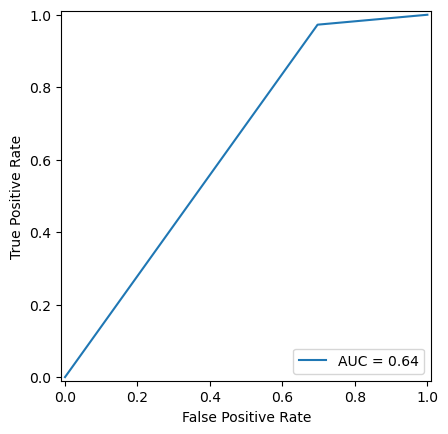

In [62]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, threshold = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc= roc_auc).plot()
plt.show()

In [63]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, ypred_test)

0.6378165213781651

# 2. KNN

In [64]:
# Hyper parameter Tuning
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1,100))}

from sklearn.model_selection import GridSearchCV
cv_classifier = GridSearchCV(estimator, param_grid, cv = 5, scoring = 'accuracy')

cv_classifier.fit(X_train, y_train)

cv_classifier.best_params_


{'n_neighbors': 8}

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

#prediction
ypred_train = knn.predict(X_train)
ypred_test = knn.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train accuracy : ", accuracy_score(y_train, ypred_train))
print("Test accuracy : ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("Cross_val_score : ", cross_val_score(knn, X, y, cv= 5).mean())



Train accuracy :  0.8156028368794326
Test accuracy :  0.7075471698113207
Cross_val_score :  0.7465588499550764


In [66]:
%%timeit
knn.fit(X_train, y_train)


3.93 ms ± 194 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# 3. SVM

In [67]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

estimator = SVC()

param_grid = {'C' : [0.1, 1.0, 10], "kernel" : ['linear', 'rbf', 'sigmoid', 'poly']}

grid = GridSearchCV(estimator, param_grid, cv = 5)

grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [68]:
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [69]:
svm_model = SVC(kernel = 'linear', C = 0.1)
svm_model.fit(X_train, y_train)

y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

print('Train_Accuracy' , accuracy_score(y_train, y_pred_train))
print('Test_Accuracy' , accuracy_score(y_test, y_pred_test))
print("Cross_val_score : ", cross_val_score(svm_model, X, y, cv= 5).mean())


Train_Accuracy 0.8274231678486997
Test_Accuracy 0.7641509433962265
Cross_val_score :  0.8148068283917341


In [70]:
%%timeit
svm_model.fit(X_train, y_train)


2.04 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 4. Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Define estimator
estimator = DecisionTreeClassifier(random_state=True)  # Fixed random_state

# Define hyperparameter grid
param_grid = {
    "criterion": ["gini", "entropy"], 
    "max_depth": [1, 2, 3, 4, 5]
}

# Perform GridSearchCV
dt_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)
dt_grid.fit(X_train, y_train)

# Best model
dt = dt_grid.best_estimator_

# Feature importance extraction
dt_fi = dt.feature_importances_

# Identify important features (set threshold)
index = [i for i, x in enumerate(dt_fi) if x > 0]  # Ensures proper feature selection



# Select features properly
X_train_dt = X_train.iloc[:, index]
X_test_dt = X_test.iloc[:, index]

# Ensure same number of rows
#print("X_train_dt shape:", X_train_dt.shape, "y_train shape:", y_train.shape)
#print("X_test_dt shape:", X_test_dt.shape, "y_test shape:", y_test.shape)

# Train best model with important features
dt.fit(X_train_dt, y_train)

# Predictions
ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

# Evaluation
print("Train Accuracy :", accuracy_score(y_train, ypred_train))
print("Test Accuracy :", accuracy_score(y_test, ypred_test))
print("Cross_val_score :", cross_val_score(dt, X_train_dt, y_train, cv=5, scoring="accuracy").mean())


Train Accuracy : 0.8274231678486997
Test Accuracy : 0.7641509433962265
Cross_val_score : 0.8274229691876751


In [72]:
%%timeit
dt.fit(X_train_dt, y_train)


3.3 ms ± 27.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [73]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=True)

In [74]:
X_train_dt

,Credit_History
47,1
88,1
146,1
328,1
474,1
...,...
163,1
160,1
420,1
398,1


# 5. Random Forest Classifier

In [75]:
from sklearn.model_selection import GridSearchCV
# model
estimator = RandomForestClassifier(random_state = True)

# Parameters (which you want to tune and identify the best)
param_grid = {"n_estimators" : list(range(1, 10))}

rf_grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv= 5)
rf_grid.fit(X_train, y_train)

rf = rf_grid.best_estimator_
rf_fi = rf.feature_importances_



In [76]:

index = [i for i, x in enumerate(rf_fi) if x > 0]

# Select features properly
X_train_rf = X_train.iloc[:, index]
X_test_rf = X_test.iloc[:, index]

# Train best model with important features
rf.fit(X_train_rf, y_train)

# Predictions
ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

# Evaluation
print("Train Accuracy :", accuracy_score(y_train, ypred_train))
print("Test Accuracy :", accuracy_score(y_test, ypred_test))
print("Cross_val_score :", cross_val_score(rf, X_train_rf, y_train, cv=5, scoring="accuracy").mean())


Train Accuracy : 0.9810874704491725
Test Accuracy : 0.7547169811320755
Cross_val_score : 0.7871988795518208


In [77]:
%%timeit
rf.fit(X_train_rf, y_train)


29.1 ms ± 800 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# AdaBoost classifier

In [78]:
from sklearn.model_selection import GridSearchCV

# modelling

from sklearn.ensemble import AdaBoostClassifier
estimator_ab = AdaBoostClassifier()

# parameters grid
param_grid_ab = {"n_estimators" : list(range(1,100))}

# grid search
grid_ab = GridSearchCV(estimator_ab, param_grid_ab, cv = 5, scoring = 'accuracy')
grid_ab.fit(X_train, y_train)

# best parameters for adaboost model
grid_ab.best_params_


{'n_estimators': 1}

In [94]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
47,1,1,0,1,0,6.435635,360,1,2,1.864518
88,1,0,0,1,0,7.067306,360,1,2,1.868019
146,0,1,2,1,0,5.292293,360,1,2,1.871920
328,0,1,0,1,0,5.999057,360,1,2,1.865992
474,1,0,2,1,0,6.630279,360,1,0,1.869365
...,...,...,...,...,...,...,...,...,...,...
163,1,1,2,1,0,6.588771,360,1,0,1.864152
160,1,1,0,0,0,5.815384,360,1,1,1.856088
420,1,1,0,1,0,6.365864,360,1,0,1.864532
398,1,0,0,0,0,5.984458,360,1,0,1.864068


In [93]:
grid_ab.best_estimator_.feature_importances_.shape

(10,)

In [90]:
feats_ab = pd.DataFrame(data = grid_ab.best_estimator_.feature_importances_,
                       index = X.columns, 
                       columns = ['Importance'])
imp_features_list_ab = feats_ab[feats_ab['Importance']>0].index.to_list()

In [80]:
# important input variables
X_imp = X[imp_features_list_ab]

# train test split
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X_imp, y, test_size = 0.2, random_state = True)

# modelling
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 6)
ada.fit(X_train_ab, y_train_ab)

# Evaluation on train data
ypred_train_ab = ada.predict(X_train_ab)

from sklearn.metrics import accuracy_score
print("Train_accuracy : ", accuracy_score(y_train_ab, ypred_train_ab))

# cross validation
from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(ada, X_train_ab, y_train_ab, cv = 5).mean())

# Evaluation
ypred_test_ab = ada.predict(X_test_ab)
print("Test_accuracy : ", accuracy_score(y_test_ab, ypred_test_ab))



Train_accuracy :  0.8085106382978723
cross_val_score :  0.8084873949579832
Test_accuracy :  0.839622641509434


In [81]:
%%timeit
ada.fit(X_train_ab, y_train_ab)


21.6 ms ± 69.8 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 7. Gradient Boost

In [82]:
from sklearn.model_selection import GridSearchCV

# modelling

from sklearn.ensemble import GradientBoostingClassifier
estimator_gb = GradientBoostingClassifier()

# parameters grid
param_grid_gb = {"n_estimators" : [1,5,10,20],
                'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1]}

# grid search
grid_gb = GridSearchCV(estimator_gb, param_grid_gb, cv = 5, scoring = 'accuracy')
grid_gb.fit(X_train, y_train)

# best parameters for GradientBoostingClassifier model
grid_gb.best_params_

{'learning_rate': 0.1, 'n_estimators': 5}

In [83]:
feats_gb = pd.DataFrame(data = grid_gb.best_estimator_.feature_importances_,
                       index = X.columns, 
                       columns = ['Importance'])
imp_features_list_gb = feats_gb[feats_gb['Importance']>0].index.to_list()
imp_features_list_gb

['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Income']

In [84]:
# important input variables
X_imp = X[imp_features_list_gb]

# train test split
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_imp, y, test_size = 0.2, random_state = True)
# modelling
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators= 20, learning_rate = 0.4)
gb.fit(X_train_gb, y_train_gb)

# Evaluation on train data
ypred_train_gb = gb.predict(X_train_gb)

from sklearn.metrics import accuracy_score
print("Train_accuracy : ", accuracy_score(y_train_gb, ypred_train_gb))

# cross validation
from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(gb, X_train_gb, y_train_gb, cv = 5).mean())

# Evaluation
ypred_test_gb = gb.predict(X_test_gb)
print("Test_accuracy : ", accuracy_score(y_test_gb, ypred_test_gb))


Train_accuracy :  0.9267139479905437
cross_val_score :  0.7825210084033613
Test_accuracy :  0.7641509433962265


In [85]:
%%timeit
gb.fit(X_train_gb, y_train_gb)


58.4 ms ± 454 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# XG_BOOST

In [86]:
from sklearn.model_selection import GridSearchCV

# modelling

from xgboost import XGBClassifier

estimator_xgb = XGBClassifier()

# parameters grid
param_grid_xgb = {"n_estimators" : [1,5,10,20],
                  'max_depth': [3,4,5],
                'gamma' : [0.1, 0.15, 0.3, 0.5, 1]}

# grid search
grid_xgb = GridSearchCV(estimator_xgb, param_grid_xgb, cv = 5, scoring = 'accuracy')
grid_xgb.fit(X_train, y_train)

# best parameters for GradientBoostingClassifier model
grid_xgb.best_params_

{'gamma': 0.1, 'max_depth': 3, 'n_estimators': 5}

In [87]:
feats_xgb = pd.DataFrame(data=grid_xgb.best_estimator_.feature_importances_,
                        index = X.columns,
                        columns=['Importance'])
imp_features_list_xgb = feats_xgb[feats_xgb['Importance'] > 0].index.to_list()
imp_features_list_xgb

['Married',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [88]:
X_imp_xgb = X[imp_features_list_xgb]

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_imp_xgb, y, test_size = 0.2,
                                                                   random_state = True)

# modelling
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma = 0.1, max_depth = 3, n_estimators = 1)
xgb.fit(X_train_xgb, y_train_xgb)

#Evaluation train data
from sklearn.metrics import accuracy_score

ypred_train = xgb.predict(X_train_xgb)
print("Train accuracy : ", accuracy_score(y_train_xgb, ypred_train))

# Cross_val_score
from sklearn.model_selection import cross_val_score

print("cross_val_score : ", cross_val_score(xgb, X_train_xgb, y_train_xgb, cv = 5).mean())

#Evaluation test data
ypred_test = xgb.predict(X_test_xgb)
print("Test accuracy : ", accuracy_score(y_test_xgb, ypred_test))


Train accuracy :  0.6832151300236406
cross_val_score :  0.721064425770308
Test accuracy :  0.7264150943396226


In [89]:
%%timeit
xgb.fit(X_train_xgb, y_train_xgb)


16.6 ms ± 164 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Save the best model